<img src='img_notebook/kpmgimg1.png' width = 300>

# VIX - Data Analytics KPMG TASK-2
**by: kintan Pitaloka Winasih**

**Their marketing team is looking to boost business by 
analysing their existing customer dataset to determine customer trends and behaviour.**

# Data Understanding

## Data Preparation

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [71]:
custadress = pd.read_csv('Clean_CustomerAddress.csv', low_memory=False, encoding='latin-1')
custdemo = pd.read_csv('Clean_CustomerDemographic.csv', low_memory=False, encoding='latin-1')
transactions = pd.read_csv('Clean_Transaction.csv', low_memory=False, encoding='latin-1')

at here we have 4 dataframes to recognize

## **Customer Demographic**

In [72]:
custdemo.sample(3)

customer_id first_name last_name  gender  \
942          2716   Claribel  Claribel  Female   
2559         1648    Prissie      Dyde  Female   
3041         2727        Kim  Gabbitis  Female   

      past_3_years_bike_related_purchases         DOB  \
942                                    46  1967-07-14   
2559                                   22  1981-09-06   
3041                                   88  1988-07-22   

                    job_title job_industry_category  wealth_segment owns_car  \
942   Systems Administrator I         Entertainment   Mass Customer       No   
2559            VP Accounting    Financial Services   Mass Customer       No   
3041   Administrative Officer    Financial Services  High Net Worth      Yes   

      tenure  age_class  
942        7         60  
2559       8         40  
3041       2         40

In [73]:
custdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   int64 
 1   first_name                           4000 non-null   object
 2   last_name                            4000 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   int64 
 5   DOB                                  4000 non-null   object
 6   job_title                            4000 non-null   object
 7   job_industry_category                4000 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   owns_car                             4000 non-null   object
 10  tenure                               4000 non-null   int64 
 11  age_class                            4000 n

In [74]:
# remove irrelevant columns for analysis in customer demographic 
datademo = custdemo.copy()
datademo.drop(columns=['DOB', 'first_name', 'last_name'], inplace=True)

In [75]:
# convert datatype customer id
datademo['customer_id']= datademo['customer_id'].astype('object')

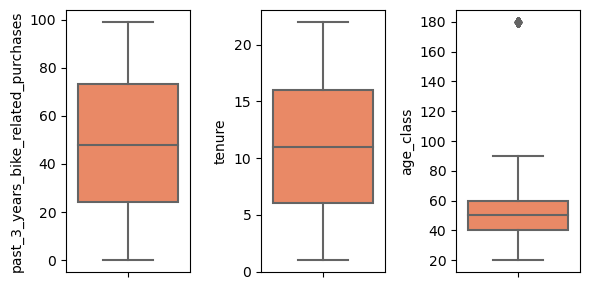

In [76]:
# check outlier
nums = datademo.loc[:, (datademo.dtypes == 'int64')].columns.tolist()
plt.figure(figsize=(6, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=datademo[nums[i]], color='coral', orient='v')
    plt.tight_layout()

### Customer Address~

In [77]:
custadress.head(3)

customer_id first_name last_name  gender  \
0          720     Darrel     Canet    Male   
1         1092     Katlin   Creddon  Female   
2         3410    Merrili   Brittin  Female   

   past_3_years_bike_related_purchases         DOB           job_title  \
0                                   67  1931-10-23  Recruiting Manager   
1                                   56  1935-08-22  VP Quality Control   
2                                   93  1940-09-22  VP Quality Control   

  job_industry_category     wealth_segment owns_car  tenure  age_class  
0                Retail  Affluent Customer       No       6         90  
1                Retail      Mass Customer       No       5         90  
2              Property      Mass Customer       No      16         80

In [78]:
custadress.sample(3)

customer_id first_name last_name  gender  \
3515         3091  Guenevere   Treffry  Female   
753          1170       Lari     Rotte  Female   
366          2680     Noella      Firk  Female   

      past_3_years_bike_related_purchases         DOB  \
3515                                   88  1995-08-13   
753                                    62  1964-11-30   
366                                     0  1959-11-05   

                           job_title job_industry_category     wealth_segment  \
3515  Payment Adjustment Coordinator         Manufacturing  Affluent Customer   
753              Assistant Professor                    IT      Mass Customer   
366                Financial Analyst    Financial Services      Mass Customer   

     owns_car  tenure  age_class  
3515      Yes       3         30  
753       Yes       4         60  
366       Yes      14         60

In [79]:
custadress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   int64 
 1   first_name                           4000 non-null   object
 2   last_name                            4000 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   int64 
 5   DOB                                  4000 non-null   object
 6   job_title                            4000 non-null   object
 7   job_industry_category                4000 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   owns_car                             4000 non-null   object
 10  tenure                               4000 non-null   int64 
 11  age_class                            4000 n

In [80]:
custadress.shape

(4000, 12)

In [81]:
custadress.describe()

customer_id  past_3_years_bike_related_purchases       tenure  \
count  4000.000000                          4000.000000  4000.000000   
mean   2000.500000                            48.890000    10.860250   
std    1154.844867                            28.715005     5.761772   
min       1.000000                             0.000000     1.000000   
25%    1000.750000                            24.000000     6.000000   
50%    2000.500000                            48.000000    11.000000   
75%    3000.250000                            73.000000    16.000000   
max    4000.000000                            99.000000    22.000000   

         age_class  
count  4000.000000  
mean     48.435000  
std      23.632401  
min      20.000000  
25%      40.000000  
50%      50.000000  
75%      60.000000  
max     180.000000

In [82]:
custadress.describe(include=["object"])

first_name last_name  gender         DOB      job_title  \
count        4000      4000    4000        4000           4000   
unique       3139      3843       2        3448            195   
top          Tobe  Pristnor  Female  1843-12-21  Social Worker   
freq            5         3    2127          88             53   

       job_industry_category wealth_segment owns_car  
count                   4000           4000     4000  
unique                     9              3        2  
top       Financial Services  Mass Customer      Yes  
freq                     943           2000     2024

In [83]:
custadress.isnull().any()

customer_id                            False
first_name                             False
last_name                              False
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                    False
job_title                              False
job_industry_category                  False
wealth_segment                         False
owns_car                               False
tenure                                 False
age_class                              False
dtype: bool

In [84]:
data_addr = custadress.copy()

In [85]:
# convert datatype customer id
data_addr['customer_id']= data_addr['customer_id'].astype('object')

In [86]:
custadress.duplicated().any()

False

**summary :**
   1. no duplicate values
   2. no null values
   3. 9999 rows, 6 colomns

## Transaction

In [87]:
transactions.head(3)

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25         False   
1               2           3         3120       2017-05-21          True   
2               3          37          402       2017-10-16         False   

           brand product_line product_class product_size list_price  \
0          Solex     Standard        medium       medium      71,49   
1  Trek Bicycles     Standard        medium        large    2091,47   
2     OHM Cycles     Standard           low       medium    1793,43   

   standard_cost product_first_sold_date  
0         5362.0              2012-12-04  
1        38892.0              2014-03-05  
2        24882.0              1999-07-22

In [88]:
transactions.sample(3)

transaction_id  product_id  customer_id transaction_date  online_order  \
1224             1268          60         2548       2017-04-08          True   
1362             1412          57         3240       2017-05-09          True   
14217           14757          97         1758       2017-07-15          True   

                brand product_line product_class product_size list_price  \
1224   Giant Bicycles     Standard          high        small    1977,36   
1362         WeareA2B      Touring        medium        large    1890,39   
14217           Solex     Standard        medium        large     202,62   

       standard_cost product_first_sold_date  
1224         1.75985              2011-08-26  
1362     26014.00000              2015-06-19  
14217    15196.00000              2004-01-18

In [89]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19273 entries, 0 to 19272
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19273 non-null  int64  
 1   product_id               19273 non-null  int64  
 2   customer_id              19273 non-null  int64  
 3   transaction_date         19273 non-null  object 
 4   online_order             19273 non-null  bool   
 5   brand                    19273 non-null  object 
 6   product_line             19273 non-null  object 
 7   product_class            19273 non-null  object 
 8   product_size             19273 non-null  object 
 9   list_price               19273 non-null  object 
 10  standard_cost            19273 non-null  float64
 11  product_first_sold_date  19273 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 1.6+ MB


In [90]:
transactions.describe()

transaction_id    product_id   customer_id  standard_cost
count    19273.000000  19273.000000  19273.000000   1.927300e+04
mean      9994.783324     45.776838   1739.545738   6.877355e+05
std       5780.372664     30.580267   1011.845427   5.654530e+07
min          1.000000      0.000000      1.000000   1.043770e+00
25%       4978.000000     18.000000    857.000000   1.087600e+04
50%       9993.000000     45.000000   1740.000000   3.807400e+04
75%      15006.000000     72.000000   2615.000000   6.494900e+04
max      20000.000000    100.000000   5034.000000   6.674000e+09

In [91]:
transactions.describe(include=["object"])

transaction_date  brand product_line product_class product_size  \
count             19273  19273        19273         19273        19273   
unique              364      6            4             3            3   
top          2017-08-18  Solex     Standard        medium       medium   
freq                 81   4128        13795         13467        12658   

       list_price product_first_sold_date  
count       19273                   19273  
unique        100                     100  
top       2091,47              1992-10-04  
freq          456                     228

In [92]:
transactions.shape

(19273, 12)

In [93]:
transactions.duplicated().any()

False

In [94]:
transactions.isnull().any()

transaction_id             False
product_id                 False
customer_id                False
transaction_date           False
online_order               False
brand                      False
product_line               False
product_class              False
product_size               False
list_price                 False
standard_cost              False
product_first_sold_date    False
dtype: bool

In [95]:
# convert to datetime
data_trans = transactions.copy()
dt = ['transaction_date', 'product_first_sold_date']
data_trans[dt] = data_trans[dt].astype('datetime64[ns]')

In [96]:
# covert to object
ls_id = ['transaction_id', 'product_id', 'customer_id']
data_trans[ls_id] = data_trans[ls_id].astype('object')

## **Combine the Dataset Into Single Dataset~**

### merge demographic and adress

In [97]:
# merge data demographic and addres
demo_addr = pd.merge(datademo, data_addr, on='customer_id')
demo_addr.sample(2)

customer_id gender_x  past_3_years_bike_related_purchases_x  \
2795         937     Male                                     65   
3831        1229     Male                                     38   

                       job_title_x job_industry_category_x   wealth_segment_x  \
2795  Human Resources Assistant IV           Manufacturing  Affluent Customer   
3831       GIS Technical Architect           Manufacturing  Affluent Customer   

     owns_car_x  tenure_x  age_class_x first_name   last_name gender_y  \
2795         No        15           40    Nikolos  McKyrrelly     Male   
3831        Yes         1           20  Sebastian       Trass     Male   

      past_3_years_bike_related_purchases_y         DOB  \
2795                                     65  1985-11-15   
3831                                     38  2000-08-01   

                       job_title_y job_industry_category_y   wealth_segment_y  \
2795  Human Resources Assistant IV           Manufacturing  Affluent Customer   
3831       GIS Technical Architect           Manufacturing  Affluent Customer   

     owns_car_y  tenure_y  age_class_y  
2795         No        15           40  
3831        Yes         1           20

In [98]:
data_all = pd.merge(data_trans,data_addr, on='customer_id')
data_all.sample(2)

transaction_id product_id customer_id transaction_date  online_order  \
6243           17401         69        3439       2017-08-22         False   
13497          12296         95         910       2017-01-22          True   

                brand product_line product_class product_size list_price  ...  \
6243   Giant Bicycles         Road        medium       medium      792,9  ...   
13497  Giant Bicycles     Standard        medium        large     569,56  ...   

       last_name  gender past_3_years_bike_related_purchases         DOB  \
6243    O'Gorman  Female                                  45  1974-10-20   
13497   Foulcher    Male                                  50  1986-04-26   

               job_title  job_industry_category     wealth_segment owns_car  \
6243    Technical Writer                 Health  Affluent Customer      Yes   
13497  Biostatistician I     Financial Services      Mass Customer       No   

      tenure age_class  
6243      19        50  
13497     14        40  

[2 rows x 23 columns]

In [99]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19270 entries, 0 to 19269
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19270 non-null  object        
 1   product_id                           19270 non-null  object        
 2   customer_id                          19270 non-null  object        
 3   transaction_date                     19270 non-null  datetime64[ns]
 4   online_order                         19270 non-null  bool          
 5   brand                                19270 non-null  object        
 6   product_line                         19270 non-null  object        
 7   product_class                        19270 non-null  object        
 8   product_size                         19270 non-null  object        
 9   list_price                           19270 non-null  object        
 10  standard_c

## Exploratory Data Analysis ~

In [100]:
# making a copy of dataset for backing up
data_merged = data_all.copy()
data_merged.reset_index(inplace = True, drop = True)

### Transaction Data ~

In [101]:
# making backup dataset
data_transaction = data_merged.copy()

**deeper analysis of datetime data by breaking it down into more specific parts.**

In [102]:
# deeper analysis of datetime data by breaking it down into more specific parts
data_transaction['transaction_year'] = data_transaction['transaction_date'].dt.strftime('%Y')
data_transaction['transaction_month'] = data_transaction['transaction_date'].dt.strftime('%B')
data_transaction['transaction_quarter'] = data_transaction['transaction_date'].dt.quarter.astype(str)
data_transaction['transaction_day'] = data_transaction['transaction_date'].dt.strftime('%d')
data_transaction['transaction_weekday'] = data_transaction['transaction_date'].dt.strftime('%A')
data_transaction.drop(['transaction_date'],axis=1,inplace=True)

**ststistical summary**

In [103]:
data_transaction.describe()

standard_cost  past_3_years_bike_related_purchases        tenure  \
count   19270.000000                         19270.000000  19270.000000   
mean    38940.151415                            48.813856     10.877841   
std     30045.194530                            28.576588      5.782621   
min         1.043770                             0.000000      1.000000   
25%     10876.000000                            24.000000      6.000000   
50%     38074.000000                            48.000000     11.000000   
75%     64949.000000                            73.000000     16.000000   
max     99366.000000                            99.000000     22.000000   

          age_class  
count  19270.000000  
mean      48.436430  
std       23.864519  
min       20.000000  
25%       40.000000  
50%       50.000000  
75%       60.000000  
max      180.000000

In [104]:
# descriptive statistic
data_transaction[data_transaction.columns.tolist()[22:27]].describe().T

count unique     top   freq
transaction_year     19270      1    2017  19270
transaction_month    19270     12  August   1728
transaction_quarter  19270      4       3   4907
transaction_day      19270     31      18    688
transaction_weekday  19270      7  Sunday   2796

**summary**
- **top transactions** in 2017, august
- **Largest monthly** transaction occur in **August**
- **Largest quarter** transaction occur in **fourth quarter**
- **Largest day** transaction in a month usually occur on **18th**
- **Largest daily** transaction in a week usually occur on **Wednesday**

**Finding the number transactions per month**

In [105]:
# aggregate by month
transaction_per_month = data_transaction.groupby(['transaction_month'])[['customer_id']].count()
transaction_per_month.reset_index(inplace=True)
transaction_per_month.columns = ['month', 'number_of_transaction']

# order by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
transaction_per_month['month'] = pd.Categorical(transaction_per_month['month'], month_order)
transaction_per_month.sort_values('month', inplace=True)
transaction_per_month

month  number_of_transaction
4     January                   1625
3    February                   1557
7       March                   1589
0       April                   1551
8         May                   1624
6        June                   1532
5        July                   1617
1      August                   1728
11  September                   1562
10    October                   1689
9    November                   1619
2    December                   1577

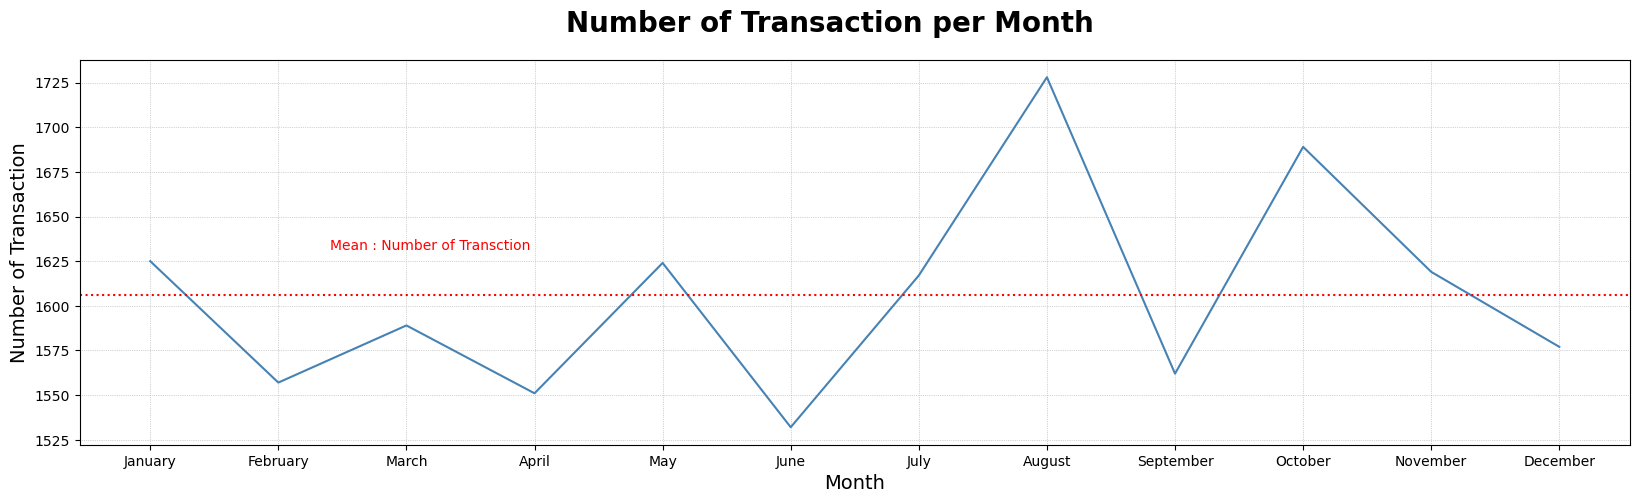

In [106]:
# visualization
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Number of Transaction per Month', fontsize=20, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Transaction', fontsize=14)

x = transaction_per_month['month']
y = transaction_per_month['number_of_transaction']
mean = y.mean()

plt.plot(x, y, color = 'steelblue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.axhline(y=mean, color='red', linestyle=':')
plt.text(0.25, 0.5, 'Mean : Number of Transction', transform=fig.transFigure, color='red')
plt.show()

as we can see the transaction decreased in Juny and September. and after this transactions increased significantly as seen in August and October.

**Number of transactions per day**

In [107]:
month_daily_transaction = data_transaction.groupby(['transaction_month','transaction_day'])[['customer_id']].count()
month_daily_transaction.reset_index(inplace=True)
month_daily_transaction.columns = ['month','day','number_of_transaction']

month_daily_transaction['month'] = pd.Categorical(month_daily_transaction['month'], month_order)
month_daily_transaction.sort_values(['month','day'], inplace=True)
month_daily_transaction

month day  number_of_transaction
119   January  01                     52
120   January  02                     52
121   January  03                     54
122   January  04                     58
123   January  05                     63
..        ...  ..                    ...
86   December  26                     54
87   December  27                     50
88   December  28                     55
89   December  29                     51
90   December  30                     45

[364 rows x 3 columns]

<AxesSubplot:xlabel='day', ylabel='month'>

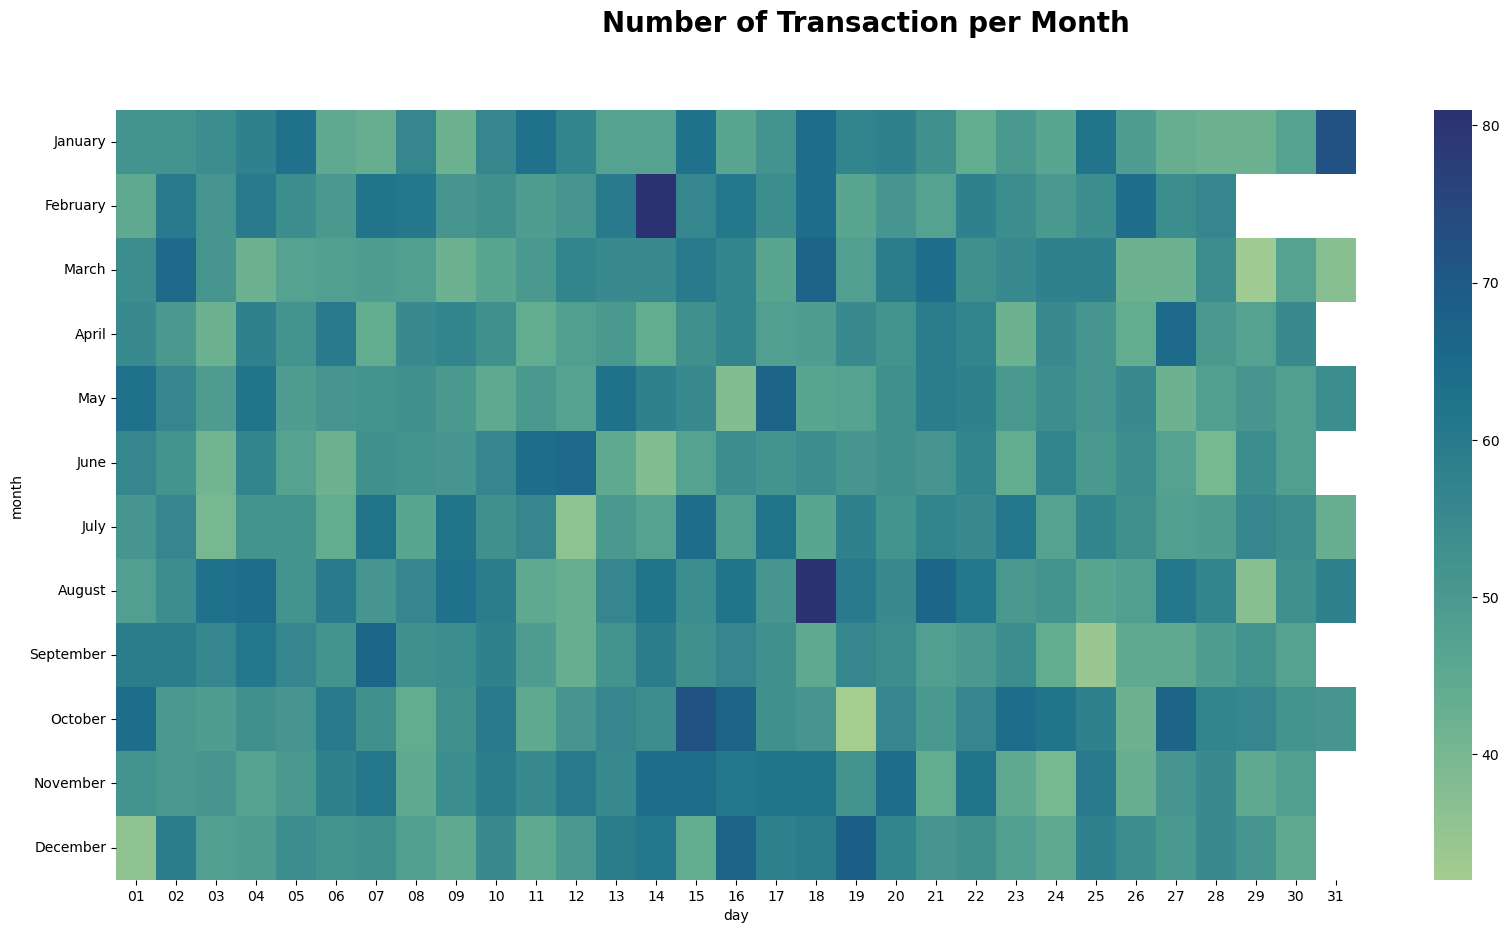

In [108]:
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Number of Transaction per Month', fontsize=20, fontweight='bold')
map = month_daily_transaction.pivot('month', 'day', 'number_of_transaction')
sns.heatmap(map, cmap='crest')

The number of transactions/day tends to fluctuate, with **significant spikes on February 14th and 18th**

**Daily transactions Trends**

In [109]:
daily_transaction = data_transaction.groupby(['transaction_weekday'])[['customer_id']].count()
daily_transaction.reset_index(inplace=True)
daily_transaction.columns = ['weekday','number_of_transaction']

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transaction['weekday'] = pd.Categorical(daily_transaction['weekday'], weekday_order)
daily_transaction.sort_values('weekday', inplace=True)
daily_transaction

weekday  number_of_transaction
1     Monday                   2746
5    Tuesday                   2771
6  Wednesday                   2742
4   Thursday                   2773
0     Friday                   2684
2   Saturday                   2758
3     Sunday                   2796

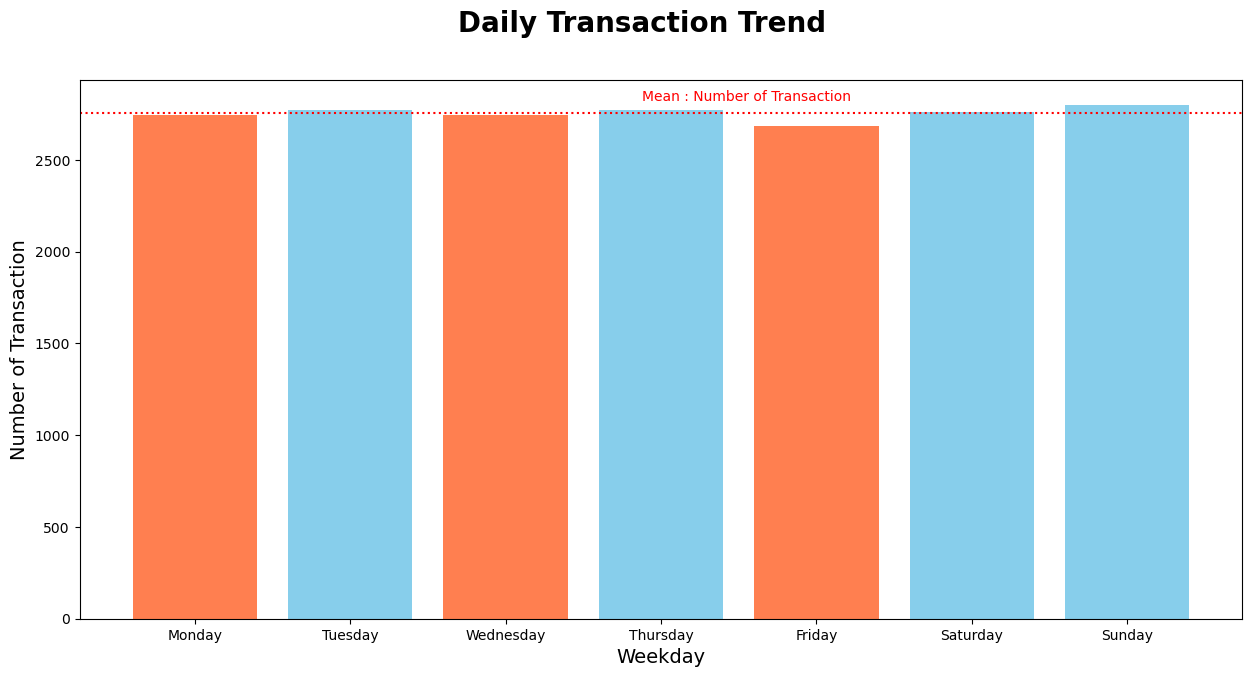

In [110]:
# visualization
fig = plt.figure(figsize=(15, 7))

fig.suptitle('Daily Transaction Trend', fontsize=20, fontweight='bold')
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Number of Transaction', fontsize=14)

x = daily_transaction['weekday']
y = daily_transaction['number_of_transaction']
mean = y.mean()

colors = []
for value in daily_transaction['number_of_transaction']:
    if value < mean:
        colors.append('coral')
    else:
        colors.append('skyblue')

plt.bar(x, y, color=colors)
plt.axhline(y=mean, color='r', linestyle=':')
plt.text(0.5, 0.85, 'Mean : Number of Transaction', transform=fig.transFigure, color='r')
plt.show()

**Summary:**

- as we can see the overall number of daily transactions is not significantly different.
- moday and wednesday is busiest day
- thursday - friday are above average, when it comes to the weekend there is a decrease in transactions

### Product Data ~

In [111]:
data_product = data_merged.copy()

In [112]:
stat = data_product[['brand', 'product_line', 'product_class', 'product_size']].describe().T
stat['% top'] = stat['freq']/stat['count']*100
stat

count unique       top   freq      % top
brand          19270      6     Solex   4127   21.41671
product_line   19270      4  Standard  13794  71.582771
product_class  19270      3    medium  13464  69.870265
product_size   19270      3    medium  12655  65.672029

- The **brand most purchased** by customers is **Solex** with a percentage of **21.41%**.
- The majority of customers **71.58% purchased Standard** bikes.
- There are **69.87%** of customers purchased a **medium class** bikes.
- There are **65.678%** of customers purchased a **medium size** bikes.

In [113]:
# brand percentage
brand = data_product['brand'].value_counts().reset_index()
brand.columns = ['brand', 'count']
brand['percentage'] = (brand['count']/brand['count'].sum()*100).round(2)
brand

brand  count  percentage
0           Solex   4127       21.42
1  Giant Bicycles   3217       16.69
2        WeareA2B   3215       16.68
3      OHM Cycles   2966       15.39
4   Trek Bicycles   2906       15.08
5  Norco Bicycles   2839       14.73

Text(0.5, 1.0, 'Percentage of Brand')

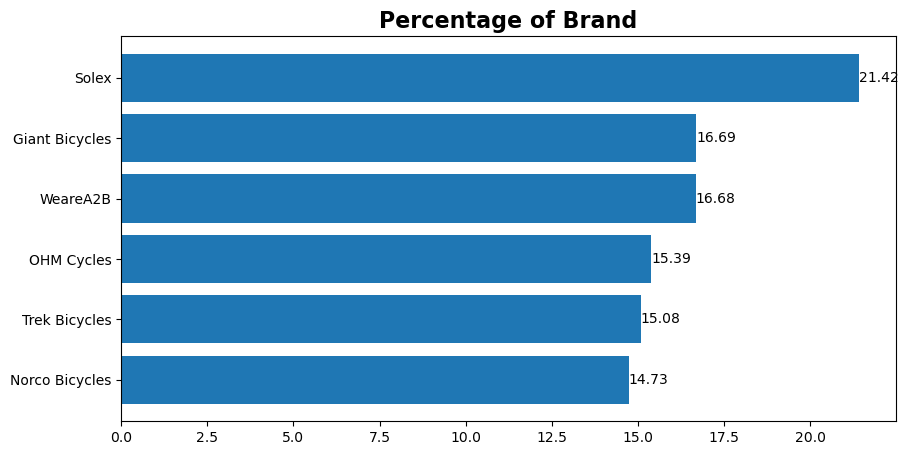

In [114]:
# visualizing job industry
fig, ax = plt.subplots(figsize=(10,5))

brand_sort = brand.sort_values(by=['percentage']).reset_index(drop=True)

bars = plt.barh(y=brand_sort['brand'], width= brand_sort['percentage'])
plt.bar_label(ax.containers[0]) 
plt.title('Percentage of Brand', fontsize=16, fontweight='bold')


#### **Percentage of Product Line with Brand Distribution**

In [115]:
line = data_product.groupby(['brand', 'product_line'])['product_line'].count()
line = line.reset_index(name='count')
line['percentage'] =  (100 * line['count'] / line.groupby('brand')['count'].transform('sum')).round(2)

pvt = line.pivot_table(columns='product_line', index='brand', values=['count', 'percentage'])
pvt.fillna(0)

count                         percentage                  \
product_line   Mountain   Road Standard Touring   Mountain   Road Standard   
brand                                                                        
Giant Bicycles      0.0  567.0   2475.0   175.0       0.00  17.63    76.94   
Norco Bicycles    194.0  901.0   1744.0     0.0       6.83  31.74    61.43   
OHM Cycles          0.0  758.0   1983.0   225.0       0.00  25.56    66.86   
Solex               0.0  515.0   3414.0   198.0       0.00  12.48    82.72   
Trek Bicycles     221.0  964.0   1721.0     0.0       7.60  33.17    59.22   
WeareA2B            0.0  152.0   2457.0   606.0       0.00   4.73    76.42   

                        
product_line   Touring  
brand                   
Giant Bicycles    5.44  
Norco Bicycles    0.00  
OHM Cycles        7.59  
Solex             4.80  
Trek Bicycles     0.00  
WeareA2B         18.85

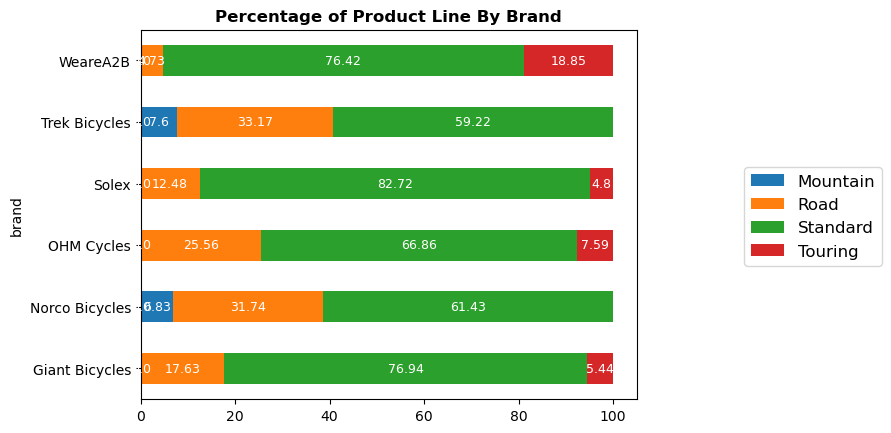

In [116]:
#visualization
pvt_count = line.pivot_table(index='brand', columns='product_line', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Line By Brand', fontweight='bold')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=9, color='white')

plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

#### **Percentage of Product Class with Brand Distribution**

In [117]:
clas = data_product.groupby(['brand', 'product_class'])['product_class'].count()
clas = clas.reset_index(name='count')
clas['percentage'] =  (100 * clas['count'] / clas.groupby('brand')['count'].transform('sum')).round(2)

pvt = clas.pivot_table(columns='product_class', index='brand', values=['count', 'percentage'])
pvt.fillna(0)

count                percentage              
product_class    high    low  medium       high    low medium
brand                                                        
Giant Bicycles  758.0  190.0  2269.0      23.56   5.91  70.53
Norco Bicycles  554.0  613.0  1672.0      19.51  21.59  58.89
OHM Cycles      747.0  597.0  1622.0      25.19  20.13  54.69
Solex           547.0  397.0  3183.0      13.25   9.62  77.13
Trek Bicycles   312.0  769.0  1825.0      10.74  26.46  62.80
WeareA2B          0.0  322.0  2893.0       0.00  10.02  89.98

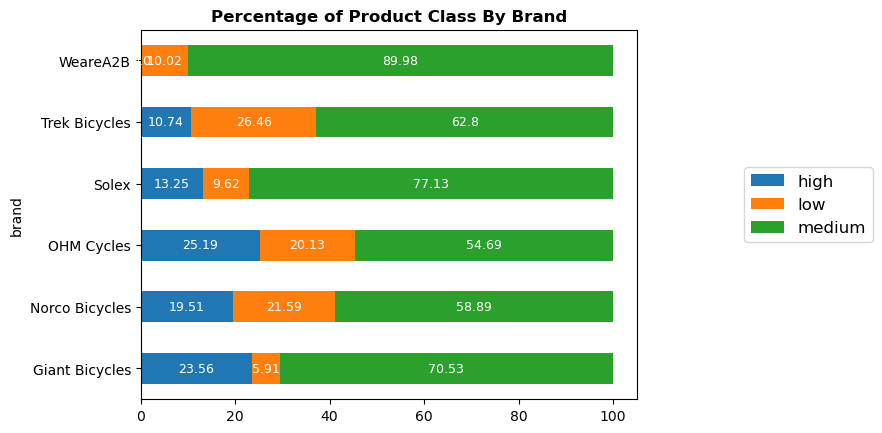

In [118]:
pvt_count = clas.pivot_table(index='brand', columns='product_class', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Class By Brand', fontweight='bold')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=9, color='white')
    
plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

#### **Percentage of Product Size with Brand Distribution**
---

In [119]:
size = data_product.groupby(['brand', 'product_size'])['product_size'].count()
size = size.reset_index(name='count')
size['percentage'] =  (100 * size['count'] / size.groupby('brand')['count'].transform('sum')).round(2)

pvt = size.pivot_table(columns='product_size', index='brand', values=['count', 'percentage'])
pvt

count              percentage              
product_size   large medium small      large medium  small
brand                                                     
Giant Bicycles   917   1732   568      28.50  53.84  17.66
Norco Bicycles   400   1693   746      14.09  59.63  26.28
OHM Cycles       192   2581   193       6.47  87.02   6.51
Solex           1055   2894   178      25.56  70.12   4.31
Trek Bicycles    881   1493   532      30.32  51.38  18.31
WeareA2B         418   2262   535      13.00  70.36  16.64

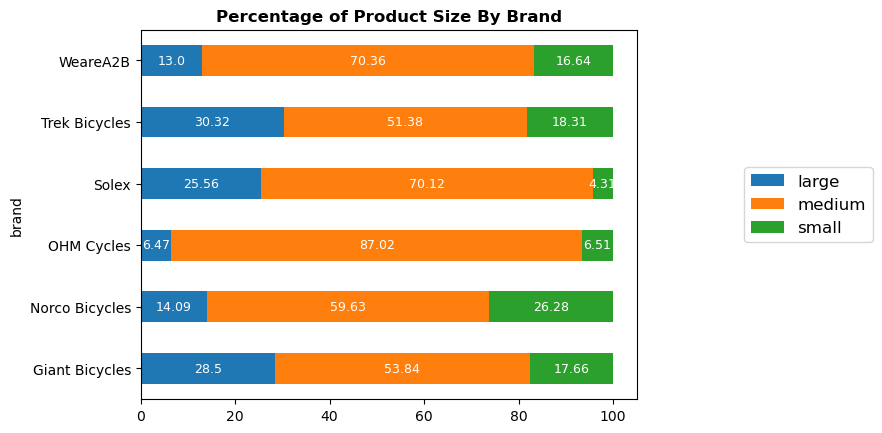

In [120]:
pvt_count = size.pivot_table(index='brand', columns='product_size', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Size By Brand', fontweight='bold')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=9, color='white')
    
plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

### Customer Data ~

In [121]:
data_cust = data_merged.copy()

In [122]:
stat = data_cust[['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car']].describe().T
stat['% top'] = stat['freq']/stat['count']*100
stat

count unique                 top   freq      % top
gender                 19270      2              Female  10098  52.402698
job_title              19270    195       Social Worker    264   1.370005
job_industry_category  19270      9  Financial Services   4571   23.72081
wealth_segment         19270      3       Mass Customer   9681  50.238713
owns_car               19270      2                 Yes   9725  50.467047

- There are **52.38%** of customers are **female**.
- Customers have a **variety** of **job titles** with the top job title of **1.26% as Legal Assistants**.
- There are **23.49%** of customers work in the **manufacturing** industry.
- There are **50.26%** of customers come from **Mass Customers**.
- There are **50.47%** of customers **having own car**.
- The majority of customers, **53.37%**, are from **New South Wales**.

#### **Wealth Segment**

In [123]:
# wealth segment percentage
wealth = data_cust['wealth_segment'].value_counts().reset_index()
wealth.columns = ['wealth_segment', 'count']
wealth['percentage'] = (wealth['count']/wealth['count'].sum()*100).round(2)
wealth

wealth_segment  count  percentage
0      Mass Customer   9681       50.24
1     High Net Worth   4923       25.55
2  Affluent Customer   4666       24.21

**Job Industry**

In [124]:
# job industry percentage
industry = data_cust['job_industry_category'].value_counts().reset_index()
industry.columns = ['job_industry', 'count']
industry['percentage'] = (industry['count']/industry['count'].sum()*100).round(2)
industry

job_industry  count  percentage
0  Financial Services   4571       23.72
1       Manufacturing   4486       23.28
2              Health   3573       18.54
3              Retail   2071       10.75
4            Property   1481        7.69
5                  IT   1164        6.04
6       Entertainment    852        4.42
7         Argiculture    666        3.46
8  Telecommunications    406        2.11

In [125]:
# top 10 job title
title = data_cust['job_title'].value_counts().reset_index()
title.columns = ['job_title', 'count']
title['percentage'] = (title['count']/title['count'].sum()*100).round(2)
top10title = title.head(10)
top10title

job_title  count  percentage
0                         Social Worker    264        1.37
1  Business Systems Development Analyst    247        1.28
2                       Legal Assistant    241        1.25
3                   Assistant Professor    240        1.25
4                        Research Nurse    234        1.21
5                    Recruiting Manager    228        1.18
6                Nuclear Power Engineer    227        1.18
7                      Internal Auditor    223        1.16
8                   Associate Professor    221        1.15
9               Assistant Media Planner    218        1.13

_________

# RFM ANALYSIS

## 1. Data Preparation

first, we must calculate the last purchase from transactions_date column, and get the monetary valur, we have to create a new profit column.

In [126]:
data_rfm = data_merged.copy()

In [127]:
data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19270 entries, 0 to 19269
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19270 non-null  object        
 1   product_id                           19270 non-null  object        
 2   customer_id                          19270 non-null  object        
 3   transaction_date                     19270 non-null  datetime64[ns]
 4   online_order                         19270 non-null  bool          
 5   brand                                19270 non-null  object        
 6   product_line                         19270 non-null  object        
 7   product_class                        19270 non-null  object        
 8   product_size                         19270 non-null  object        
 9   list_price                           19270 non-null  object        
 10  standard_c

In [128]:
# making last purchase column for recency
most_recent_purchase = data_rfm['transaction_date'].max()
data_rfm['last_purchase_days_ago'] = most_recent_purchase - data_rfm['transaction_date']
data_rfm['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
data_rfm['last_purchase_days_ago'] = data_rfm['last_purchase_days_ago'].astype('int64')

In [129]:
data_rfm['list_price']

0          71,49
1         1403,5
2         478,16
3        2091,47
4        1129,13
          ...   
19265     227,88
19266     441,49
19267    2083,94
19268    2091,47
19269    2091,47
Name: list_price, Length: 19270, dtype: object

In [130]:
# Replace commas with periods in the 'values' column
data_rfm['list_price'] = data_rfm['list_price'].str.replace(',', '.')

In [131]:
data_rfm['standard_cost']

0         5362.0
1        95482.0
2        29872.0
3        38892.0
4        67748.0
          ...   
19265    13673.0
19266     8499.0
19267    67503.0
19268    38892.0
19269    38892.0
Name: standard_cost, Length: 19270, dtype: float64

In [132]:
data_rfm['list_price']= pd.to_numeric(data_rfm['list_price'], errors='coerce')

In [133]:
# making column profit for monetery
data_rfm['profit'] = data_rfm['list_price'] - data_rfm['standard_cost']

In [134]:
data_rfm['profit']

0        -5290.51
1       -94078.50
2       -29393.84
3       -36800.53
4       -66618.87
           ...   
19265   -13445.12
19266    -8057.51
19267   -65419.06
19268   -36800.53
19269   -36800.53
Name: profit, Length: 19270, dtype: float64

## 2. Data Aggregation

RFM is abasic customer segmentation algorithm based on their **purchasing behaviour**. The behaviour is identified by using only three customer data points:
1. The recency value of each customer is obtained from the smallest recency value from the dataset.
2. The frequency value of each customer is obtained from the count of transactions they place.
3. The monetary value of each customer is obtained from the profit (list_price - standard_cost).

In [135]:
# making rfm table
rfm_table = data_rfm.groupby('customer_id').agg({'last_purchase_days_ago': lambda x: x.min(),
                                                    'customer_id': lambda x: len(x),
                                                    'profit': lambda x: x.sum()})

rfm_table.rename(columns={'last_purchase_days_ago': 'recency', 
                          'customer_id': 'frequency', 
                          'profit': 'monetary'}, inplace=True)

In [136]:
rfm_table

recency  frequency      monetary
customer_id                                  
1                  7         11 -444411.08142
2                 54          3 -188131.93000
3                102          7 -344118.47860
4                195          2  -81667.28000
5                 16          6 -240546.84377
...              ...        ...           ...
3496             180          4 -115319.09911
3497              21          3 -205830.93000
3498              89          6 -197795.94000
3499              29          7 -264149.52000
3500              59          6 -192015.75718

[3489 rows x 3 columns]

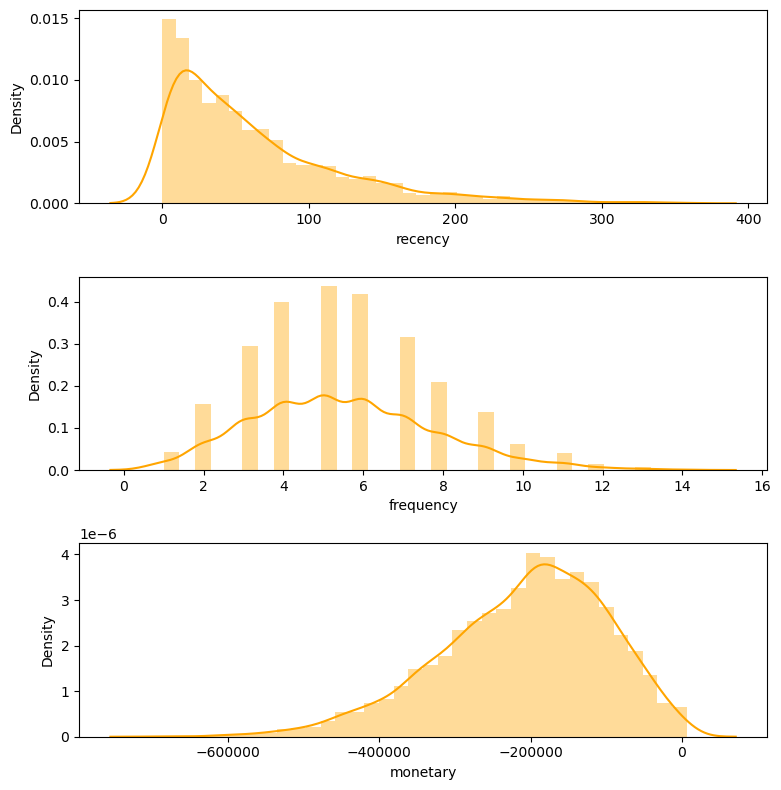

In [137]:
# looking distribution
rfm = ['recency', 'frequency', 'monetary']

plt.figure(figsize=(8, 8))
for i in range(0, len(rfm)):
    plt.subplot(len(rfm), 1, i+1)
    sns.distplot(rfm_table[rfm[i]], color='orange')
    plt.tight_layout()

as we can see, the data looks have right-skewed and left-skewed

## 3. Scoring

The **qcut** function will calculate the score in the column according to the quartile calculation, the output is a range of 1-5. Customers **get more points if they make frequent purchases, make a lot of purchases, and spend a lot of money**.

In [138]:
# Recency, if the transaction happened recently give 5 points . 
rfm_table['R_score'] = pd.qcut(rfm_table['recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency, 5 = Most frequent , 1 = rarely
rfm_table['F_score'] = pd.qcut(rfm_table['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Monetery, 5 = best, 1 = least
rfm_table['M_score'] = pd.qcut(rfm_table['monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm_table.head(5)

recency  frequency      monetary R_score F_score M_score
customer_id                                                          
1                  7         11 -444411.08142       5       5       1
2                 54          3 -188131.93000       3       1       3
3                102          7 -344118.47860       2       4       1
4                195          2  -81667.28000       1       1       5
5                 16          6 -240546.84377       4       3       2

Calculate the overall RFM score
This step can be done in two ways:

- **Concatenation** : creating segments Here we just concatenate (not add) individual RFM scores like strings and get labeled segments in return. The highest is 555 and the lowest is 111.
- **Addition** : creates a score, here we find the average of the individual RFM scores indicating the customer's score. Highest 5 and lowest 1.

In [139]:
# creating rfm score
rfm_table['RFM_segment'] = rfm_table['R_score'].astype(str) + rfm_table['F_score'].astype(str) + rfm_table['M_score'].astype(str)
rfm_table['RFM_score'] = ((rfm_table['R_score'].astype('int64') + rfm_table['F_score'].astype('int64') + rfm_table['M_score'].astype('int64')) / 3).round(2)

In [140]:
rfm_table.sample(3)

recency  frequency      monetary R_score F_score M_score  \
customer_id                                                             
1681              18          5 -192274.42377       4       3       3   
1949             116          7 -487542.39000       1       4       1   
2351             125          7 -239827.18000       1       4       2   

            RFM_segment  RFM_score  
customer_id                         
1681                433       3.33  
1949                141       2.00  
2351                142       2.33

## 4. Segmentation and Score Labeling

After calculations on the RFM data we can create customer segments:

| **Segment** | **Interpretation** |
|----|----|
| **Champions** | Bought recently, buy often and spend the most. |
| **Loyal customers**| Buy on a regular basis. Responsive to promotions. |
| **Potential loyalist** | Recent customers with average frequency. |
| **Recent customers** | Bought most recently, but not often. |
| **Promising** | Recent shoppers, but haven’t spent much. |
| **Needs attention** | Above average recency, frequency and monetary values. May not have bought very recently though. |
| **About to sleep** | Below average recency and frequency. Will lose them if not reactivated. |
| **At risk** | Some time since they’ve purchased. Need to bring them back! |
| **Can’t lose them** | Used to purchase frequently but haven’t returned for a long time. |
| **Hibernating** | Last purchase was long back and low number of orders. May be lost. |

We will use Recency and Frequency to segment our customers and determined how to segment customers using regex.

In [141]:
# creating segment
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [142]:
# applying segment
rfm_table['Segment'] = rfm_table['R_score'].astype(str) + rfm_table['F_score'].astype(str)
rfm_table['Segment'] = rfm_table['Segment'].replace(seg_map, regex=True)

Customer score:

| **Score** | RFM_Score |
|---|---|
| **Diamond** | 5 - 4.1 |
| **Platinum** | 4 - 3.1 |
| **Gold** | 3 - 2.1 |
| **Silver** | 2 - 1.1 |
| **Bronze** | 1 - 0 |

In [143]:
# create labels for the scores
rfm_table['Score'] = np.where(rfm_table['RFM_score'] > 4, 'Diamond',
                              np.where(rfm_table['RFM_score'] > 3, 'Platinum',
                                       np.where(rfm_table['RFM_score'] > 2, 'Gold',
                                                np.where(rfm_table['RFM_score'] > 1, 'Silver',
                                                         'Bronze'))))

In [144]:
rfm_table.sample(5)

recency  frequency      monetary R_score F_score M_score  \
customer_id                                                             
277              109          3 -178738.52000       1       1       3   
2693               1          6 -230504.36000       5       4       2   
2749              34          1  -72296.44000       3       1       5   
317               50          4 -147678.52911       3       2       4   
1200              20          8 -175963.14936       4       5       3   

            RFM_segment  RFM_score          Segment     Score  
customer_id                                                    
277                 113       1.67      Hibernating    Silver  
2693                542       3.67        Champions  Platinum  
2749                315       3.00   About to Sleep      Gold  
317                 324       3.00   About to Sleep      Gold  
1200                453       4.00  Loyal Customers  Platinum

## 5. Analysis

In [145]:
rfm_data = rfm_table.reset_index().copy()

In [147]:
rfm_data.sample(5)

customer_id  recency  frequency      monetary R_score F_score M_score  \
619           621        2          9 -454458.61236       5       5       1   
3045         3054        2          5 -201040.32090       5       3       3   
612           614       18          9 -235097.00000       4       5       2   
896           900       12          4 -164127.56000       5       2       4   
2222         2228      168          4  -85903.80936       1       2       5   

     RFM_segment  RFM_score              Segment     Score  
619          551       3.67            Champions  Platinum  
3045         533       3.67  Potential Loyalists  Platinum  
612          452       3.67      Loyal Customers  Platinum  
896          524       3.67  Potential Loyalists  Platinum  
2222         125       2.67          Hibernating      Gold

### Statistical Summary

**Recency vs Frequency**

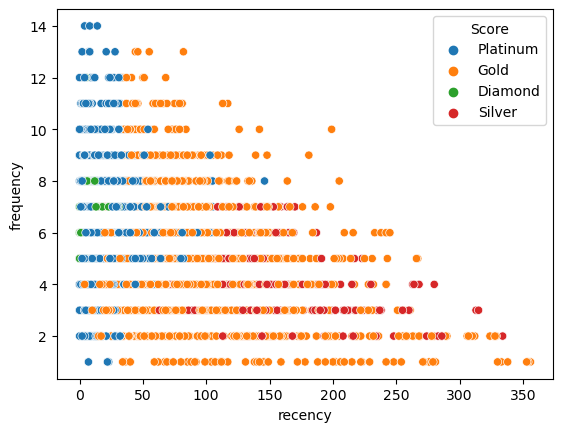

In [149]:
data = pd.DataFrame(data=rfm_data,columns=['customer_id','Score','recency','frequency','monetary'])

# plot data with seaborn
facet = sns.scatterplot(data=data, x='recency', y='frequency', hue='Score', palette='tab10')

A **high frequency** is found with customers who have a **recent purchase within average of two months**.

**Monetery vs Frequency**

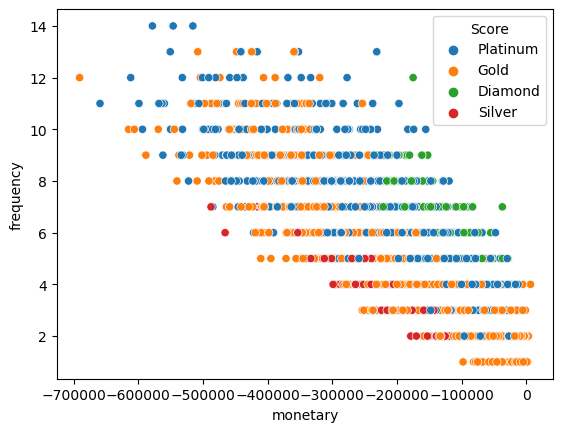

In [150]:
# plot data with seaborn
facet = sns.scatterplot(data=data, x='monetary', y='frequency', hue='Score', palette='tab10')

Customers who **buy frequently spend less money**.

**Regency vs Frequency vs Monetary**

In [151]:
# rfm_data['Score'] = rfm_data['Score'].astype(str)
import plotly.express as px

plt.figure(figsize=(20, 20))

fig = px.scatter_3d(rfm_data,x='recency', y='frequency', z='monetary',
              color='Score', opacity=0.9,color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

<Figure size 2000x2000 with 0 Axes>

In the above plot, the color specifies Cluster. From the above plot, we can see how the customers are spread among Recency, Frequency and Monetary dimension

**Score**

In [152]:
# create agg dictionary
agg_dict = {'customer_id': 'count', 
            'recency': 'mean',
            'frequency': 'mean',
            'monetary': 'mean'}

In [153]:
score_cat =['Diamond', 'Platinum', 'Gold', 'Silver', 'Bronze']
rfm_data['Score'] = pd.Categorical(rfm_data['Score'], categories = score_cat)

df_sc = rfm_data.groupby('Score').agg(agg_dict).reset_index()
df_sc.rename({'Score': 'Score', 'customer_id': 'count'}, axis=1, inplace=True)
df_sc['count %'] = (100 * df_sc['count'] / df_sc['count'].sum()).round(2)
df_sc['monetary %'] = (100 * df_sc['monetary'] / df_sc['monetary'].sum()).round(2)
df_sc

Score  count     recency  frequency       monetary  count %  monetary %
0   Diamond     83    8.638554   7.072289 -144985.206776     2.38       18.42
1  Platinum   1326   21.603318   6.398190 -219455.075570    38.01       27.88
2      Gold   1805   83.491967   5.036011 -202447.032137    51.73       25.72
3    Silver    275  145.316364   4.032727 -220340.846108     7.88       27.99
4    Bronze      0         NaN        NaN            NaN     0.00         NaN

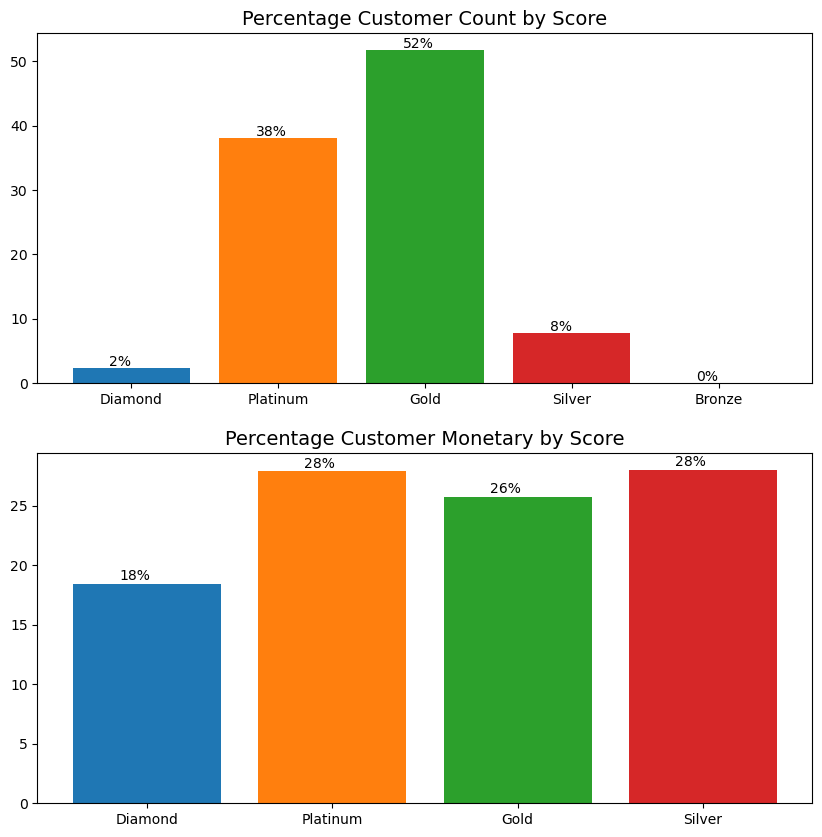

In [154]:
# bar chart - count
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))

ax[0].bar(x='Score', height='count %', data=df_sc, color=sns.color_palette('tab10'))
ax[1].bar(x='Score', height='monetary %', data=df_sc, color=sns.color_palette('tab10'))

ax[0].set_ylabel('')
ax[0].set_title('Percentage Customer Count by Score', fontsize=14)

ax[1].set_ylabel('')
ax[1].set_title('Percentage Customer Monetary by Score', fontsize=14)

for p in ax[0].patches:
    ax[0].annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.3))
for p in ax[1].patches:
    ax[1].annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.3))

- **Most of customers are Platinum** with a percentage of **profit contribution (monetary) of 27%**.
- Customers who contribute the **most to generating the highest profit are Diamond**, which is 39%. However, the **number of these customers is low** enough which is only 17%.

**Segment**

In [155]:
df_seg = rfm_data.groupby('Segment').agg(agg_dict).reset_index()
df_seg.rename({'Segment': 'Segment', 'customer_id': 'count'}, axis=1, inplace=True)
df_seg['count %'] = (100 * df_seg['count'] / df_seg['count'].sum()).round(2)
df_seg['monetary %'] = (100 * df_seg['monetary'] / df_seg['monetary'].sum()).round(2)
df_seg.sort_values(by='count', ascending=False, inplace=True)
df_seg

Segment  count     recency  frequency       monetary  count %  \
4          Hibernating    744  137.534946   3.134409 -119334.761402    21.32   
5      Loyal Customers    649   34.702619   7.755008 -298993.918964    18.60   
8  Potential Loyalists    540   14.903704   4.859259 -181784.838955    15.48   
1              At Risk    497  104.480885   5.841046 -218701.830971    14.24   
3            Champions    380    6.931579   8.042105 -296345.716901    10.89   
0       About to Sleep    229   45.934498   3.641921 -138339.248956     6.56   
6       Need Attention    148   45.094595   5.391892 -198998.374311     4.24   
2          Can't Loose    145   88.772414   8.682759 -332985.163373     4.16   
9            Promising     88   22.579545   2.761364 -117840.760928     2.52   
7        New Customers     69    7.521739   2.724638 -100803.386287     1.98   

   monetary %  
4        5.95  
5       14.92  
8        9.07  
1       10.91  
3       14.79  
0        6.90  
6        9.93  
2       16.61  
9        5.88  
7        5.03

In [157]:
pip install squarify

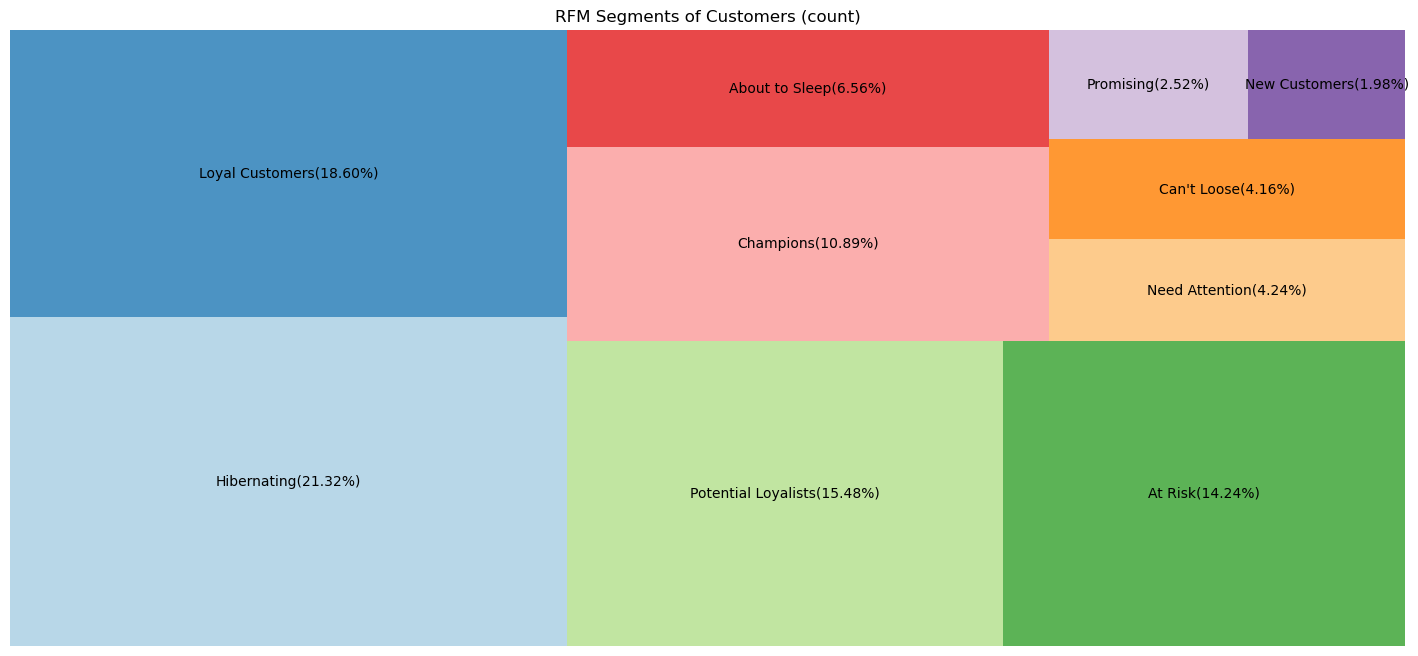

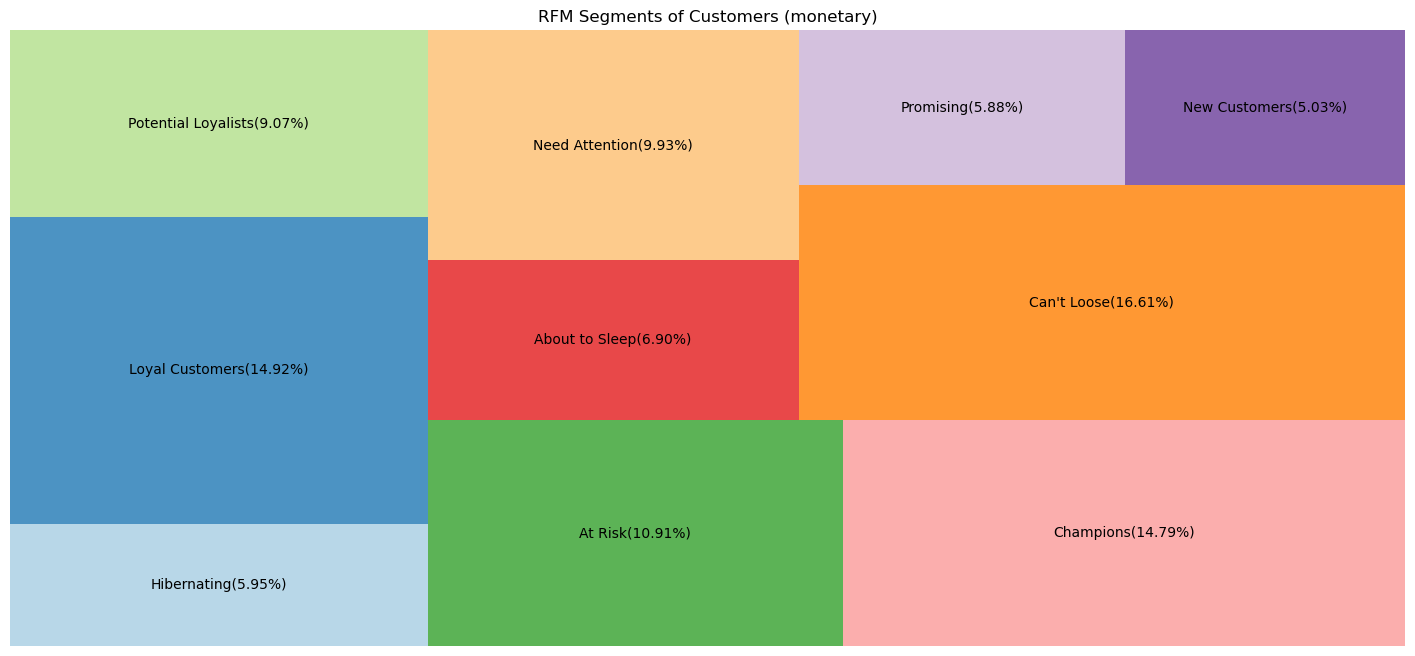

In [158]:
import squarify
import matplotlib.pyplot as plt

for col in ['count', 'monetary']:
    labels = df_seg['Segment'] + df_seg[col + ' %'].apply(lambda x: '({0:.2f}%)'.format(x))

    fig, ax = plt.subplots(figsize=(18,8))
    squarify.plot(sizes=df_seg[col], label=labels, alpha=.8, color=sns.color_palette('Paired', len(df_seg)))
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

- **Most of customers** are in the **Hibernating, Loyal Customers, and Potential Loyalist**.
- **Most of profit** comes from the segment of **Can't Loose, Champions, and Loyal Customers**.

**Interpretation**

In [159]:
# Aggregate data by each customer
rfm1 = rfm_data.groupby(['Score','Segment'])['Segment'].count()
rfm1 = rfm1.reset_index(name='count')
rfm1['percentage'] =  (100 * rfm1['count'] / rfm1.groupby('Score')['count'].transform('sum')).round(2)
# rfm1
pvt = rfm1.pivot_table(index='Score', columns='Segment', values='percentage')
pvt

Segment   About to Sleep  At Risk  Can't Loose  Champions  Hibernating  \
Score                                                                    
Diamond             0.00     0.00         0.00      72.29         0.00   
Platinum            1.89     2.71         1.21      24.13         0.00   
Gold               11.30    21.55         7.15       0.00        29.97   
Silver              0.00    26.18         0.00       0.00        73.82   

Segment   Loyal Customers  Need Attention  New Customers  Potential Loyalists  \
Score                                                                           
Diamond              9.64            0.00           0.00                18.07   
Platinum            29.41            4.52           4.75                28.21   
Gold                13.91            4.88           0.33                 8.37   
Silver               0.00            0.00           0.00                 0.00   

Segment   Promising  
Score                
Diamond        0.00  
Platinum       3.17  
Gold           2.55  
Silver         0.00

|Customer Score|%|RFM Segment|RFM Interpretation|Actionable Insight|
|---|---|---|---|---|
|Diamond|17%|50% Champions; 47% Loyal Customers|Customers who transacted recently, buy often, with a high or low amount of monetary spending. The majority of Diamond customers are Champions and Loyal Customers.| To retain champion customers, companies can reward them. And to convert Loyal Customers into Champion customers, the company should engage them more frequently, ask for reviews, or upsell higher-value products.|
|Platinum|30%|35% Loyal Customers; 27% Potential Loyalists|Customers who made their last transaction some time ago, spend a good amount and purchase more than once or often. RFM segmentation shows that 35% of them are Loyal Customers and 27% are Potential Loyalists.| Companies should offer loyalty programs with benefits like points or discounts for customers and recommend other products to them.|
|Gold|28%|32% At Risk|Customers who spend big money and purchase often but haven't purchased for a long time. RFM segmentation in Gold customer shows that majority 32% of them are At Risk|Companies should bring them back by sending personalized emails or newsletters to reconnect and offer promotions or discounts.|
|Silver|20%|66% Hibernating|Customers who made their last transaction a long time ago, and who have made few purchases. RFM segmentation shows that majority of Silver customers are Hibernating.|Offer other personalized or relevant products, and give more special discount.|
|Bronze|6%|100% Hibernating|Can identify as a lost customer. Lowest recency, frequency, and monetary scores.| Companies can revive interest with outreach campaigns or ignore them otherwise.|

## 6. Customer Demographic Analysis Based on RFM

In [160]:
# copy customer demographic dataset
df_customer = demo_addr.copy()

We will attach RFM and scoring labels to the customer demographics dataset and we will conduct further analysis on customer characteristics that have potential for marketing strategies.

In [161]:
rfm_data1 = rfm_data[['customer_id', 'RFM_score', 'Score', 'Segment']].copy()

In [162]:
# merge dataset by id customers
df_allcust = pd.merge(df_customer, rfm_data1, on = 'customer_id')

In [163]:
df_allcust.sample(3)

customer_id gender_x  past_3_years_bike_related_purchases_x  \
2659         856     Male                                     63   
1958        2138   Female                                     23   
2606        2862     Male                                     46   

           job_title_x job_industry_category_x wealth_segment_x owns_car_x  \
2659  Quality Engineer      Financial Services    Mass Customer        Yes   
1958  Graphic Designer           Manufacturing   High Net Worth         No   
2606   Cost Accountant      Financial Services    Mass Customer         No   

      tenure_x  age_class_x first_name  ...         DOB       job_title_y  \
2659         9           40     Peyton  ...  1988-01-10  Quality Engineer   
1958        15           40     Jonell  ...  1978-11-28  Graphic Designer   
2606        10           40    Normand  ...  1987-12-23   Cost Accountant   

      job_industry_category_y wealth_segment_y owns_car_y tenure_y  \
2659       Financial Services    Mass Customer        Yes        9   
1958            Manufacturing   High Net Worth         No       15   
2606       Financial Services    Mass Customer         No       10   

     age_class_y RFM_score     Score              Segment  
2659          40      3.67  Platinum            Champions  
1958          40      2.67      Gold      Loyal Customers  
2606          40      3.33  Platinum  Potential Loyalists  

[3 rows x 23 columns]

### Statistical Summary Of All Customers

**Numerical Columns**

In [164]:
df_allcust.describe().T.round(2)

count   mean    std    min    25%  \
past_3_years_bike_related_purchases_x  3489.0  48.80  28.60   0.00  24.00   
tenure_x                               3489.0  10.89   5.78   1.00   6.00   
age_class_x                            3489.0  48.35  23.66  20.00  40.00   
past_3_years_bike_related_purchases_y  3489.0  48.80  28.60   0.00  24.00   
tenure_y                               3489.0  10.89   5.78   1.00   6.00   
age_class_y                            3489.0  48.35  23.66  20.00  40.00   
RFM_score                              3489.0   3.00   0.61   1.33   2.67   

                                        50%    75%     max  
past_3_years_bike_related_purchases_x  48.0  73.00   99.00  
tenure_x                               11.0  16.00   22.00  
age_class_x                            50.0  60.00  180.00  
past_3_years_bike_related_purchases_y  48.0  73.00   99.00  
tenure_y                               11.0  16.00   22.00  
age_class_y                            50.0  60.00  180.00  
RFM_score                               3.0   3.33    4.67

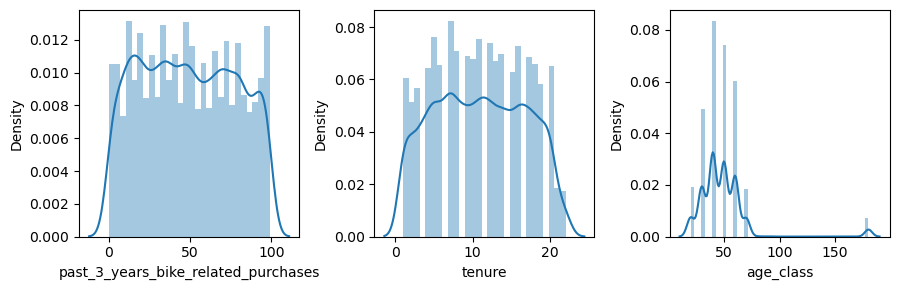

In [166]:
# looking distribution
nums = ['past_3_years_bike_related_purchases', 'tenure', 'age_class']
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.distplot(data_merged[nums[i]])
    plt.tight_layout()

**Categorical Columns**

In [173]:
# multivariate analysis
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames = None, colnames = None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1
    return (np.sqrt(stat/(obs*mini)))

### Targeted Customer Demographic

We decided to focus on exploring insight **Diamond Customers** that generate the most profit for the company.

In [177]:
# filtering data Diamond Customers
df_target = df_allcust[df_allcust['Score'] == 'Diamond']

In [178]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 11 to 3481
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   customer_id                            83 non-null     object  
 1   gender_x                               83 non-null     object  
 2   past_3_years_bike_related_purchases_x  83 non-null     int64   
 3   job_title_x                            83 non-null     object  
 4   job_industry_category_x                83 non-null     object  
 5   wealth_segment_x                       83 non-null     object  
 6   owns_car_x                             83 non-null     object  
 7   tenure_x                               83 non-null     int64   
 8   age_class_x                            83 non-null     int64   
 9   first_name                             83 non-null     object  
 10  last_name                              83 non-null     object

### Statistical Summary of Diamond Customers

 **Numerical Columns**

In [180]:
df_target.describe().T.round(2)

count   mean    std    min    25%  \
past_3_years_bike_related_purchases_x   83.0  51.35  28.92   0.00  29.00   
tenure_x                                83.0  10.94   6.13   1.00   6.00   
age_class_x                             83.0  48.55  24.75  20.00  35.00   
past_3_years_bike_related_purchases_y   83.0  51.35  28.92   0.00  29.00   
tenure_y                                83.0  10.94   6.13   1.00   6.00   
age_class_y                             83.0  48.55  24.75  20.00  35.00   
RFM_score                               83.0   4.40   0.14   4.33   4.33   

                                         50%    75%     max  
past_3_years_bike_related_purchases_x  54.00  73.00   99.00  
tenure_x                               11.00  16.00   22.00  
age_class_x                            40.00  60.00  180.00  
past_3_years_bike_related_purchases_y  54.00  73.00   99.00  
tenure_y                               11.00  16.00   22.00  
age_class_y                            40.00  60.00  180.00  
RFM_score                               4.33   4.33    4.67

 **Categorical Columns**

In [ ]:
gender.columns = ['gender', 'count']
